##**Heart Disease Detection**##

Deteksi Penyakit Jantung dibuat menggunakan *Machine Learning* dengan Algoritma *Artificial Neural Network (ANN) Backpropagation Methods*

In [ ]:
# Import Library
import warnings; warnings.simplefilter ('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
print(tf.__version__)

2.15.0


In [ ]:
# Upload File
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart.csv to heart (8).csv
User uploaded file "heart (8).csv" with length 38114 bytes


In [ ]:
# Visualize the Data
df = pd.read_csv("heart.csv")
df.head(10)

N, P = df.shape # Data Size
print('Baris = ', N, '\nKolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(df))
df

Baris =  1025 
Kolom (jumlah variabel) =  14
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Look the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# List Column
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# Summary Data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Looking at the Missing Values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Look at unique data
df = df.select_dtypes(include=['float64', 'int64'])

# Print unique values for each numeric column
for col in df.columns:
    unique_values = set(df[col].unique())
    print(f"{col} : {unique_values}")

age : {29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77}
sex : {0, 1}
cp : {0, 1, 2, 3}
trestbps : {128, 129, 130, 132, 134, 135, 136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156, 160, 164, 165, 170, 172, 174, 178, 180, 192, 200, 94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117, 118, 120, 122, 123, 124, 125, 126}
chol : {564, 126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275, 276, 277,

In [ ]:
# Drop the 'age' column from the DataFrame
df_dropped= df.drop(columns=['age'])

# Check the DataFrame to ensure 'age' column is dropped
df_dropped

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_columns = ['trestbps','chol','thalach','oldpeak','ca']

scaler = StandardScaler()
numeric_df = df_dropped[numeric_columns]

numeric_scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns = scaler.get_feature_names_out())
numeric_scaled_df.head()

,trestbps,chol,thalach,oldpeak,ca
0,-0.377636,-0.659332,0.821321,-0.060888,1.209221
1,0.479107,-0.833861,0.255968,1.727137,-0.731971
2,0.764688,-1.396233,-1.048692,1.301417,-0.731971
3,0.936037,-0.833861,0.516900,-0.912329,0.238625
4,0.364875,0.930822,-1.874977,0.705408,2.179817


In [ ]:
from sklearn.preprocessing import OneHotEncoder

nominal_columns = ['cp','restecg','slope','thal']
ohc = OneHotEncoder(sparse_output=False, drop=None)

dummies_df = pd.DataFrame(ohc.fit_transform(df[nominal_columns]), columns = ohc.get_feature_names_out())
dummies_df

,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1021,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1022,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1023,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df_clean_data = pd.concat([numeric_scaled_df, dummies_df, df[['sex', 'fbs','exang','target']]], axis=1)
df_clean_data

,trestbps,chol,thalach,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,restecg_0,...,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,sex,fbs,exang,target
0,-0.377636,-0.659332,0.821321,-0.060888,1.209221,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0
1,0.479107,-0.833861,0.255968,1.727137,-0.731971,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
2,0.764688,-1.396233,-1.048692,1.301417,-0.731971,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0
3,0.936037,-0.833861,0.516900,-0.912329,0.238625,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0
4,0.364875,0.930822,-1.874977,0.705408,2.179817,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.479107,-0.484803,0.647366,-0.912329,-0.731971,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,0,1,1
1021,-0.377636,0.232705,-0.352873,1.471705,0.238625,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0
1022,-1.234378,0.562371,-1.353113,-0.060888,0.238625,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
1023,-1.234378,0.155137,0.429923,-0.912329,-0.731971,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,1


Lihat persebaran datanya melalui plot histogram

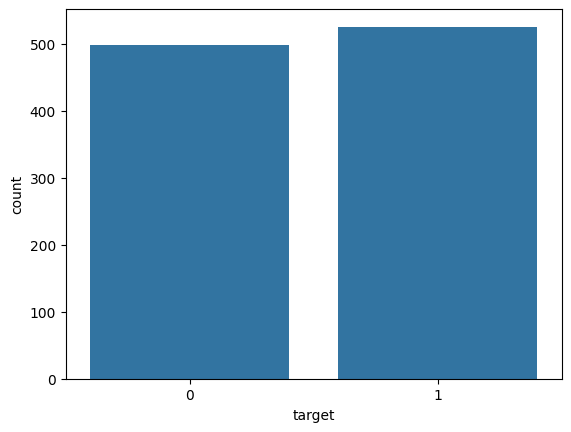

Counter({1: 526, 0: 499})
YES = 51.31707317073171 % NO = 48.68292682926829 %


In [ ]:
from collections import Counter

# sns.countplot for visualization
sns.countplot(data=df_clean_data, x='target')
plt.show()

# Count occurrences of each value in the 'target' column
D = Counter(df_clean_data['target'])
print(D)

# Calculate and print percentages
total = len(df_clean_data['target'])
yes_count = D[1] if 1 in D else 0  # Assuming 'YES' is represented by 1
no_count = D[0] if 0 in D else 0   # Assuming 'NO' is represented by 0

print("YES =", yes_count * 100 / total, '% NO =', no_count * 100 / total, '%')

In [ ]:
# Assume df is your original DataFrame
df_encode_data = df_clean_data.copy()

# Ensure 'sex' column is present and convert to 'object' type if needed
if 'sex' in df_encode_data.columns:
    df_encode_data['sex'] = df_encode_data['sex'].astype('object')
else:
    print("The 'sex' column does not exist in the DataFrame")

# One-Hot Encoding for 'sex' column
transformation_gender = pd.get_dummies(df_encode_data['sex'], prefix='sex')
encode_data = pd.concat([df_encode_data, transformation_gender], axis=1)

# Debug: Print column names to verify encoding
print("Columns after one-hot encoding:", encode_data.columns)

# Remove 'sex' column after one-hot encoding
try:
    encode_data.drop(columns=['sex'], axis=1, inplace=True)
except KeyError as err_:
    print(err_)

# Verify the columns to move exist
cols_to_move = [col for col in encode_data.columns if col.startswith('sex_')]
print("Columns to move:", cols_to_move)

# Move columns 'sex_0' and 'sex_1' before 'target'
remaining_cols = [col for col in encode_data.columns if col not in cols_to_move]
df_encode_data = encode_data[cols_to_move + remaining_cols]

# Convert boolean columns to float64
df_encode_data['sex_0'] = df_encode_data['sex_0'].astype('float64')
df_encode_data['sex_1'] = df_encode_data['sex_1'].astype('float64')

# See the latest data after using the 'One-Hot Encoding' technique
J, K = df_encode_data.shape  # Data Size
print('Baris terbaru = ', J, '\nKolom (jumlah variabel) terbaru = ', K)
print("Tipe Variabel Data Encoding = ", type(df_encode_data))
df_encode_data

Columns after one-hot encoding: Index(['trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2',
       'cp_3', 'restecg_0', 'restecg_1', 'restecg_2', 'slope_0', 'slope_1',
       'slope_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'sex', 'fbs',
       'exang', 'target', 'sex_0', 'sex_1'],
      dtype='object')
Columns to move: ['sex_0', 'sex_1']
Baris terbaru =  1025 
Kolom (jumlah variabel) terbaru =  24
Tipe Variabel Data Encoding =  <class 'pandas.core.frame.DataFrame'>


,sex_0,sex_1,trestbps,chol,thalach,oldpeak,ca,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,fbs,exang,target
0,0.0,1.0,-0.377636,-0.659332,0.821321,-0.060888,1.209221,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0
1,0.0,1.0,0.479107,-0.833861,0.255968,1.727137,-0.731971,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0
2,0.0,1.0,0.764688,-1.396233,-1.048692,1.301417,-0.731971,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0
3,0.0,1.0,0.936037,-0.833861,0.516900,-0.912329,0.238625,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0
4,1.0,0.0,0.364875,0.930822,-1.874977,0.705408,2.179817,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.0,1.0,0.479107,-0.484803,0.647366,-0.912329,-0.731971,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,1
1021,0.0,1.0,-0.377636,0.232705,-0.352873,1.471705,0.238625,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0
1022,0.0,1.0,-1.234378,0.562371,-1.353113,-0.060888,0.238625,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0
1023,1.0,0.0,-1.234378,0.155137,0.429923,-0.912329,-0.731971,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,1


Lihat data setelah dilakukan encoding

In [ ]:
# Looking the data info after encode
df_encode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex_0      1025 non-null   float64
 1   sex_1      1025 non-null   float64
 2   trestbps   1025 non-null   float64
 3   chol       1025 non-null   float64
 4   thalach    1025 non-null   float64
 5   oldpeak    1025 non-null   float64
 6   ca         1025 non-null   float64
 7   cp_0       1025 non-null   float64
 8   cp_1       1025 non-null   float64
 9   cp_2       1025 non-null   float64
 10  cp_3       1025 non-null   float64
 11  restecg_0  1025 non-null   float64
 12  restecg_1  1025 non-null   float64
 13  restecg_2  1025 non-null   float64
 14  slope_0    1025 non-null   float64
 15  slope_1    1025 non-null   float64
 16  slope_2    1025 non-null   float64
 17  thal_0     1025 non-null   float64
 18  thal_1     1025 non-null   float64
 19  thal_2     1025 non-null   float64
 20  thal_3  

**Artificial Neural Network (ANN)**

Dalam membuat dan melatih model ANN, ada library yang disediakan oleh Google langsung bernama Tensorflow.

Sebelum melatih model, alangkah baiknya diubah dulu jenis data 'int64' menjadi 'float64'. Alasannya karena ketika melatih model, model akan dikonversikan terlebih dahulu menjadi 'Tensorflow Dataset'.

Tensorflow sendiri hanya mendukung variabel 'float' bukan 'int' ketika ingin dikonversikan ke dalam numpy.

In [ ]:
# Convert Pandas Dataframe to Tensorflow Dataset
df_tf_convert = df_encode_data.copy()
print("Kolom yang ada di dalam :\n",df_tf_convert.columns)

# Remove whitespaces from column names
df_tf_convert.columns = df_tf_convert.columns.str.strip()

# Update columns_to_convert_float_corrected
columns_to_convert_float_corrected = ['sex_0', 'sex_1', 'trestbps', 'chol', 'thalach',
                                      'oldpeak','ca','cp_0','cp_1','cp_2','cp_3', 'restecg_0',
                                      'restecg_1', 'restecg_2', 'slope_0', 'slope_1', 'slope_2',
                                      'thal_0', 'thal_1', 'thal_2', 'thal_3',
                                      'fbs', 'exang', 'target']

# Convert specified columns to float64
df_tf_convert[columns_to_convert_float_corrected] = df_tf_convert[columns_to_convert_float_corrected].astype('float64')

# Look the data after updating
df_tf_convert

Kolom yang ada di dalam :
 Index(['sex_0', 'sex_1', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1', 'restecg_2',
       'slope_0', 'slope_1', 'slope_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3',
       'fbs', 'exang', 'target'],
      dtype='object')


,sex_0,sex_1,trestbps,chol,thalach,oldpeak,ca,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,fbs,exang,target
0,0.0,1.0,-0.377636,-0.659332,0.821321,-0.060888,1.209221,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.479107,-0.833861,0.255968,1.727137,-0.731971,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.0,1.0,0.764688,-1.396233,-1.048692,1.301417,-0.731971,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.936037,-0.833861,0.516900,-0.912329,0.238625,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.364875,0.930822,-1.874977,0.705408,2.179817,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.0,1.0,0.479107,-0.484803,0.647366,-0.912329,-0.731971,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1021,0.0,1.0,-0.377636,0.232705,-0.352873,1.471705,0.238625,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1022,0.0,1.0,-1.234378,0.562371,-1.353113,-0.060888,0.238625,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1023,1.0,0.0,-1.234378,0.155137,0.429923,-0.912329,-0.731971,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Looking the data update
df_tf_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex_0      1025 non-null   float64
 1   sex_1      1025 non-null   float64
 2   trestbps   1025 non-null   float64
 3   chol       1025 non-null   float64
 4   thalach    1025 non-null   float64
 5   oldpeak    1025 non-null   float64
 6   ca         1025 non-null   float64
 7   cp_0       1025 non-null   float64
 8   cp_1       1025 non-null   float64
 9   cp_2       1025 non-null   float64
 10  cp_3       1025 non-null   float64
 11  restecg_0  1025 non-null   float64
 12  restecg_1  1025 non-null   float64
 13  restecg_2  1025 non-null   float64
 14  slope_0    1025 non-null   float64
 15  slope_1    1025 non-null   float64
 16  slope_2    1025 non-null   float64
 17  thal_0     1025 non-null   float64
 18  thal_1     1025 non-null   float64
 19  thal_2     1025 non-null   float64
 20  thal_3  

In [ ]:
# Set x and y
x = df_tf_convert.drop('target', axis=1)
y = df_tf_convert['target']

In [ ]:
# Check initial class distribution
initial_distribution = y.value_counts()
print("Class distribution:\n", initial_distribution)

Class distribution:
 target
1.0    526
0.0    499
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the desired number of samples for each class
desired_class_count = 530

# Define the over-sampling and under-sampling steps
over = SMOTE(sampling_strategy={0: desired_class_count, 1: desired_class_count}, random_state=42)
under = RandomUnderSampler(sampling_strategy={0: desired_class_count, 1: desired_class_count}, random_state=42)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

# Apply the resampling
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Print the final class distribution
final_distribution = pd.Series(y_resampled).value_counts()
print("Class distribution after resampling:\n", final_distribution)
print(f"Jumlah data dalam x_resampled sekarang: {len(x_resampled)} dan jumlah data y_resampled sekarang: {len(y_resampled)}")

Class distribution after resampling:
 target
0.0    530
1.0    530
Name: count, dtype: int64
Jumlah data dalam x_resampled sekarang: 1060 dan jumlah data y_resampled sekarang: 1060


Lakukan splitting dataset

In [ ]:
# Splitting into train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert Dataframe to Tensorflow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test.values, y_test.values))

print("Ukuran Input (x) Training  =", x_train.shape, "\nUkuran Output (y) Training =", y_train.shape)
print("Ukuran Input (x) Testing  =", x_test.shape, "\nUkuran Output (y) Testing =", y_test.shape)

Ukuran Input (x) Training  = (820, 23) 
Ukuran Output (y) Training = (820,)
Ukuran Input (x) Testing  = (205, 23) 
Ukuran Output (y) Testing = (205,)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1038, input_shape=(len(x_train.columns),), activation='leaky_relu', name="dense_1"),
    tf.keras.layers.Dense(512, activation='leaky_relu', name="dense_2"),
    tf.keras.layers.Dense(132, activation='leaky_relu', name="dense_3"),
    tf.keras.layers.Dense(32, activation='leaky_relu', name="dense_4"),
    tf.keras.layers.Dense(1, activation='sigmoid', name="dense_5"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1038)              24912     
                                                                 
 dense_2 (Dense)             (None, 512)               531968    
                                                                 
 dense_3 (Dense)             (None, 132)               67716     
                                                                 
 dense_4 (Dense)             (None, 32)                4256      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 628885 (2.40 MB)
Trainable params: 628885 (2.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define w and b as trainable variables
W1, b1 = model.get_layer("dense_1").get_weights()
W2, b2 = model.get_layer("dense_2").get_weights()
W3, b3 = model.get_layer("dense_3").get_weights()
W4, b4 = model.get_layer("dense_4").get_weights()
W5, b5 = model.get_layer("dense_5").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)
print(f"W3{W3.shape}:\n", W3, f"\nb1{b3.shape}:", b3)
print(f"W4{W4.shape}:\n", W4, f"\nb2{b4.shape}:", b4)
print(f"W5{W5.shape}:\n", W5, f"\nb2{b5.shape}:", b5)

W1(23, 1038):
 [[-0.02131979  0.07169078 -0.0101234  ...  0.00580215  0.04041154
   0.03135936]
 [ 0.02446444  0.01457182 -0.00158059 ...  0.02376933  0.00172924
   0.05001982]
 [ 0.04529892 -0.04313312 -0.01852746 ... -0.03747655 -0.07341351
   0.01349534]
 ...
 [ 0.02567314 -0.04427436  0.05705223 ...  0.02917382 -0.03149745
   0.07055261]
 [ 0.05722795  0.05669569  0.02257503 ... -0.01392204  0.01717471
   0.04615652]
 [ 0.06603337 -0.06837831 -0.06595824 ... -0.07483242  0.07142546
  -0.01275546]] 
b1(1038,): [0. 0. 0. ... 0. 0. 0.]
W2(1038, 512):
 [[ 0.04145863  0.05716945  0.02063424 ... -0.01315224  0.04735819
  -0.02651704]
 [-0.00087253  0.05016099  0.04808023 ...  0.04704326 -0.00859547
  -0.03083098]
 [-0.00270042 -0.05902842  0.04914172 ...  0.03451956  0.02496117
  -0.01250485]
 ...
 [ 0.01960962 -0.05983828  0.02733551 ...  0.04014305 -0.05786484
  -0.02426801]
 [ 0.05383248 -0.01467456 -0.05375396 ... -0.05423667 -0.00346749
   0.06209633]
 [-0.01927212 -0.04461677 -0.03

In [ ]:
# Define the optimizer, loss function, and metrics
optimizer_function = tf.keras.optimizers.Adam()
loss_function = tf.keras.losses.BinaryCrossentropy()

# Compile model
model.compile(optimizer=optimizer_function,
              loss=loss_function,
              metrics=['accuracy'])

In [ ]:
# Training loop with tf.GradientTape
@tf.function
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_function(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer_function.apply_gradients(zip(gradients, model.trainable_variables))
    return loss, predictions

# Training the model
epochs = 20
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.BinaryAccuracy()

    # Training loop with batching
    for x_batch, y_batch in train_dataset.batch(32):
        loss_value, predictions = train_step(x_batch, y_batch)
        epoch_loss_avg.update_state(loss_value)
        epoch_accuracy.update_state(y_batch, predictions)

    # Calculate validation loss and accuracy
    val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=2)

    # Append to lists for plotting
    train_losses.append(epoch_loss_avg.result())
    train_accuracies.append(epoch_accuracy.result())
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Display metrics at the end of each epoch
    print(f"Epoch {epoch + 1}: Loss: {epoch_loss_avg.result()}, Accuracy: {epoch_accuracy.result()}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

7/7 - 1s - loss: 0.3920 - accuracy: 0.8244 - 572ms/epoch - 82ms/step
Epoch 1: Loss: 0.3934578597545624, Accuracy: 0.8475610017776489, Val Loss: 0.3920051157474518, Val Accuracy: 0.8243902325630188
7/7 - 0s - loss: 0.3641 - accuracy: 0.8439 - 131ms/epoch - 19ms/step
Epoch 2: Loss: 0.2893095016479492, Accuracy: 0.8914633989334106, Val Loss: 0.3640958368778229, Val Accuracy: 0.8439024686813354
7/7 - 0s - loss: 0.3080 - accuracy: 0.8537 - 121ms/epoch - 17ms/step
Epoch 3: Loss: 0.22026298940181732, Accuracy: 0.9243902564048767, Val Loss: 0.3079698383808136, Val Accuracy: 0.8536585569381714
7/7 - 0s - loss: 0.2432 - accuracy: 0.9024 - 92ms/epoch - 13ms/step
Epoch 4: Loss: 0.17540612816810608, Accuracy: 0.9365853667259216, Val Loss: 0.243233323097229, Val Accuracy: 0.9024389982223511
7/7 - 0s - loss: 0.1757 - accuracy: 0.9366 - 153ms/epoch - 22ms/step
Epoch 5: Loss: 0.1317346692085266, Accuracy: 0.9536585211753845, Val Loss: 0.17566847801208496, Val Accuracy: 0.9365853667259216
7/7 - 0s - los

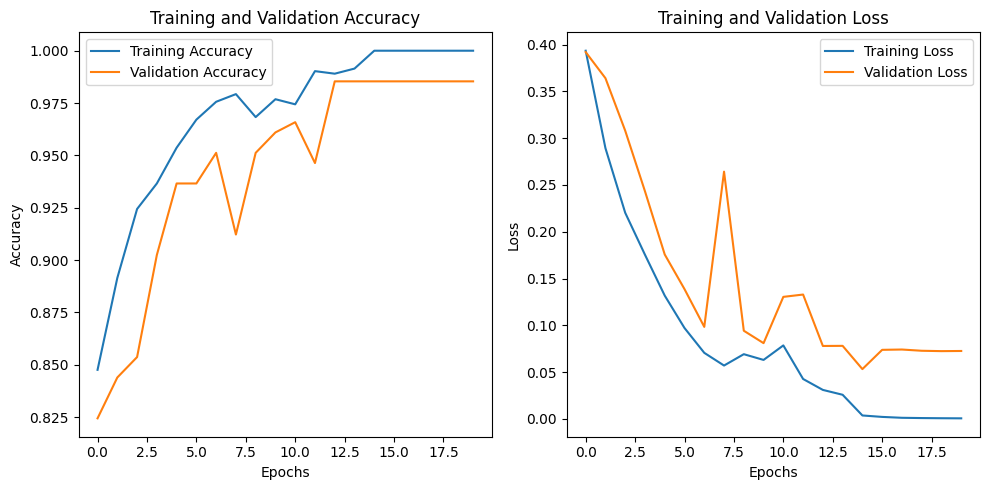

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

7/7 [==============================] - 0s 4ms/step


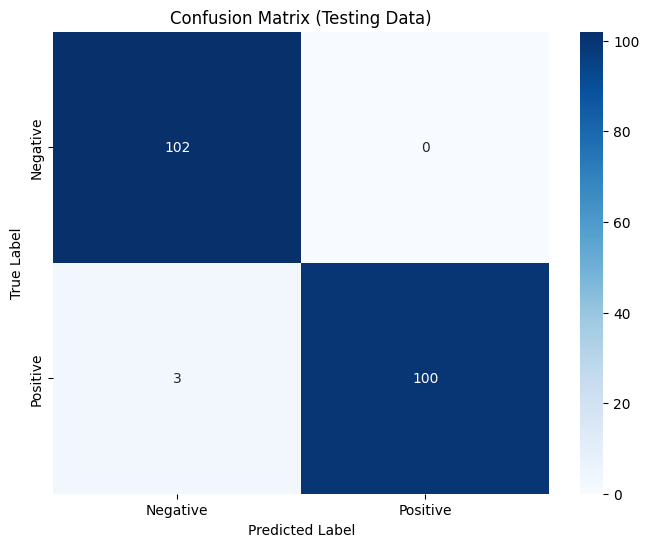

Testing Data Confusion Matrix:
[[102   0]
 [  3 100]]

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
# Predict testing set labels
y_test_pred = model.predict(x_test)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Convert predictions to binary labels for testing data
y_test_binary = (y_test > 0.5).astype(int)

# Compute confusion matrix for testing data
test_conf_matrix = confusion_matrix(y_test_binary, y_test_pred_binary)

# Compute classification report for testing data
test_class_report = classification_report(y_test_binary, y_test_pred_binary)

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Testing Data)')
plt.show()

print("Testing Data Confusion Matrix:")
print(test_conf_matrix)
print("\nTesting Data Classification Report:")
print(test_class_report)